In [2]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import torch
import numpy
import tikzplotlib
from bus import calculate_slowdown_factor
import road as rd

In [3]:
distances = torch.linspace(-30, 30, 120)

stop_factors = calculate_slowdown_factor(distances)

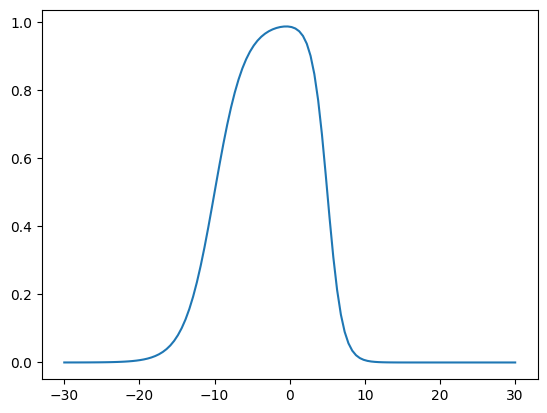

In [19]:
plt.plot(distances, stop_factors)
tikzplotlib.save("../figurer/bus_activation.tex")

### Visualize with an example

Suppose road is of length 100 meters, and that the bus stop is placed at 75 meters
Look at the reduction of flux for some positions of the bus

In [4]:
L = 100
stop_pos = 75
bus_positions = torch.tensor([20., 60., 70., 80.])
positions = [20, 60, 70, 80]
interface_positions = torch.linspace(0, L, 200)


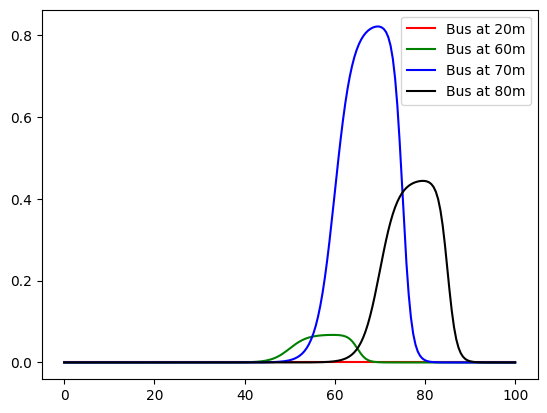

In [34]:
colors = ['r', 'g', 'b', 'k', ]
for i, pos in enumerate(bus_positions):
    stopping_factor = calculate_slowdown_factor(pos - stop_pos) * 0.9
    interface_reduction = stopping_factor*calculate_slowdown_factor(interface_positions - pos)

    plt.plot(interface_positions, interface_reduction, colors[i], label = f"Bus at {positions[i]}m")

plt.legend()
tikzplotlib.save("../figurer/bus_interface_reduction.tex")

#### Reduction due to traffic lights:

In [8]:
# Traffic light activation
def light_activation(activation):
    # centered around 0.5
    return torch.sigmoid(20 * (activation - 0.5))

In [6]:
road = rd.Road(1, 100, 3, [torch.tensor(50.0/3.6)], [])

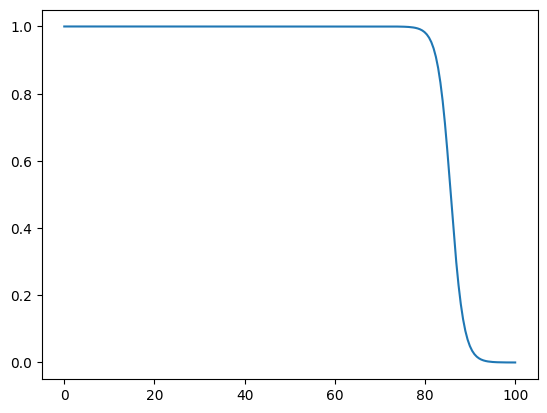

In [11]:
lengths = torch.linspace(0,1, 200)
activations = torch.linspace(0,1,200)

road_activation = road.activation_fnc(lengths)
light_activations = light_activation(activations)

plt.plot(lengths*100, road_activation)
tikzplotlib.save("../figurer/bus_slowing_junction.tex")
# plt.plot(activations, light_activations)
# plt.show()